In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

%matplotlib inline

In [2]:
def eff_dim(x, s = 50.):
    x = x[x!=1.]
    return np.sum(x / (x + s))

In [3]:
img_list = np.zeros((16, 9))

for i, widths in enumerate(range(4, 68, 4)):
    for j, depths in enumerate(range(9)):
        try:
            current_eigs = np.load('../experiments/eigenvalues/width_depth_exp/width_'+str(widths)+'_depth_'+\
                               str(depths)+'.npz')['pos_evals']
            img_list[i,j] = eff_dim(current_eigs)
        except:
            print('width: ', widths, 'depth: ', depths, 'failed')

Text(0, 0.5, 'Width')

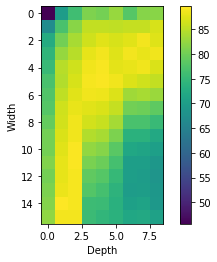

In [4]:
plt.imshow(img_list)
plt.colorbar()
plt.xlabel('Depth')
plt.ylabel('Width')

In [5]:
loss_list = np.zeros((4, 16, 9))

for i, widths in enumerate(range(4, 68, 4)):
    for j, depths in enumerate(range(9)):
        try:
            #current_eigs = np.load('../experiments/eigenvalues/width_depth_exp/width_'+str(widths)+'_depth_'+\
            #                   str(depths)+'.npz')['pos_evals']
            #img_list[i,j] = eff_dim(current_eigs)
            current_file = "../experiments/eigenvalues/width_depth_exp/depth_"+str(depths)+\
                            "_width_"+str(widths)+".log"
            output = subprocess.check_output("tail -n 2 "+current_file, 
                                 shell=True).decode("utf-8").split()
            output_cut = np.array(output[2:6]).astype(np.float64)
            loss_list[:, i, j] = output_cut
            
        except:
            print('width: ', widths, 'depth: ', depths, 'failed')

Text(0.5, 1.0, 'Test Loss')

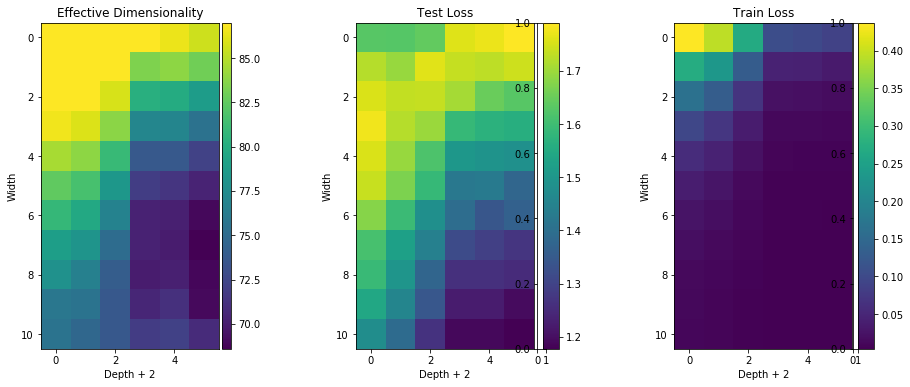

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, ax = plt.subplots(1, 3, figsize = (16, 6))
p1 = ax[0].imshow(img_list[5:, 3:], vmax=87)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(p1, cax=cax)

#fig.colorbar(p1, ax=cax)

ax[0].set_xlabel('Depth + 2')
ax[0].set_ylabel('Width')
ax[0].set_title('Effective Dimensionality')

p2 = ax[2].imshow(loss_list[0, 5:, 3:])
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="3%", pad=0.01)
fig.colorbar(p2, ax=cax)

ax[2].set_xlabel('Depth + 2')
ax[2].set_ylabel('Width')
ax[2].set_title('Train Loss')

p3 = ax[1].imshow(loss_list[2, 5:, 3:])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p3, ax=cax)
ax[1].set_xlabel('Depth + 2')
ax[1].set_ylabel('Width')
ax[1].set_title('Test Loss')

In [18]:
import hess.nets as nets

In [19]:
model_cfg = getattr(nets, "ConvNet")

pars_im = np.zeros((16, 9))

for i, widths in enumerate(range(4, 68, 4)):
    for j, depths in enumerate(range(9)):
        # we're using cifar100
        model = model_cfg.base(*model_cfg.args, num_classes=100, **model_cfg.kwargs,
                               c=widths, max_depth=depths)
        pars = sum(m.numel() for m in model.parameters())
        pars_im[i,j] = pars

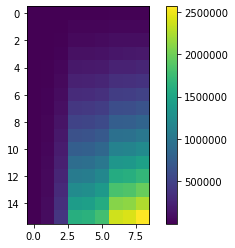

In [22]:
plt.imshow(pars_im)
plt.colorbar()

In [24]:
import pickle

with open("../saved-experiments/width_depth_experiment_logs.pkl", "wb") as handle:
    pickle.dump(
                {'eff_dim': img_list, 'losses': loss_list, 'parameters': pars_im}, 
        handle, pickle.HIGHEST_PROTOCOL)